# Setup

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# TF Models Pretrained Models from Tensorflow Model Zoo and Install Tensor flow object detection

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
#!tf_upgrade_v2 -h

In [11]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !brew install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

==> Searching for similarly named formulae and casks...
==> Formulae
protobuf-c

To install protobuf-c, run:
  brew install protobuf-c
Processing /Volumes/Study/University/Semester 5/ML LAB/sign_language_detection/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.8/982.8 kB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 2.1 MB/s eta 0:00:0000:0100:01


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1662969 sha256=f4bf3f1a5bdf55a629e6c400fec981f3d44a189dc90422577c2686093edbe1ff
  Stored in directory: /private/var/folders/m6/c267rt092gl6wlb9f6509r_h0000gn/T/pip-ephem-wheel-cache-f4k5vrtw/wheels/9c/fd/d9/70c7515da6063eb79763d37cfdcd00fc93fc79e03f79700794
Successfully built object-detection
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.13.0
    Uninstalling protobuf-3.13.0:
      Successfully uninstalled protobuf-3.13.0
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [12]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-12-25 19:38:50.238372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

I1225 19:39:02.411224 4567098880 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b0
I1225 19:39:02.411343 4567098880 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 64
I1225 19:39:02.411392 4567098880 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 3
I1225 19:39:02.413425 4567098880 efficientnet_model.py:143] round_filter input=32 output=32
I1225 19:39:02.434006 4567098880 efficientnet_model.py:143] round_filter input=32 output=32
I1225 19:39:02.434115 4567098880 efficientnet_model.py:143] round_filter input=16 output=16
I1225 19:39:02.497163 4567098880 efficientnet_model.py:143] round_filter input=16 output=16
I1225 19:39:02.497270 4567098880 efficientnet_model.py:143] round_filter input=24 output=24
I1225 19:39:02.656991 4567098880 efficientnet_model.py:143] round_filter input=24 output=24
I1225 19:39:02.657101 4567098880 efficientnet_model.py:143] round_filt

I1225 19:39:05.984987 4567098880 efficientnet_model.py:143] round_filter input=24 output=24
I1225 19:39:05.985116 4567098880 efficientnet_model.py:143] round_filter input=40 output=48
I1225 19:39:06.339017 4567098880 efficientnet_model.py:143] round_filter input=40 output=48
I1225 19:39:06.339150 4567098880 efficientnet_model.py:143] round_filter input=80 output=88
I1225 19:39:06.636238 4567098880 efficientnet_model.py:143] round_filter input=80 output=88
I1225 19:39:06.636352 4567098880 efficientnet_model.py:143] round_filter input=112 output=120
I1225 19:39:06.920720 4567098880 efficientnet_model.py:143] round_filter input=112 output=120
I1225 19:39:06.920838 4567098880 efficientnet_model.py:143] round_filter input=192 output=208
I1225 19:39:07.325134 4567098880 efficientnet_model.py:143] round_filter input=192 output=208
I1225 19:39:07.325271 4567098880 efficientnet_model.py:143] round_filter input=320 output=352
I1225 19:39:07.495762 4567098880 efficientnet_model.py:143] round_filt

I1225 19:39:12.281649 4567098880 efficientnet_model.py:143] round_filter input=1280 output=1792
I1225 19:39:12.327142 4567098880 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv

I1225 19:39:19.237978 4567098880 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.8, depth_coefficient=2.6, resolution=528, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=80, output_filters=112, kernel_size=5, num_repeat=

In [10]:
#!pip install tf-models-official --upgrade

In [12]:
#!pip install tensorflow-object-detection-api

In [11]:
import object_detection


In [11]:
!pip list

Package                         Version
------------------------------- -------------------
absl-py                         1.3.0
anyio                           3.6.2
apache-beam                     2.43.0
appnope                         0.1.3
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
asttokens                       2.1.0
astunparse                      1.6.3
attrs                           22.1.0
avro-python3                    1.10.2
backcall                        0.2.0
beautifulsoup4                  4.11.1
bleach                          5.0.1
cachetools                      5.2.0
certifi                         2022.9.24
cffi                            1.15.1
charset-normalizer              2.1.1
cloudpickle                     2.2.0
colorama                        0.4.6
commonmark                      0.9.1
contextlib2                     21.6.0
contourpy                       1.0.6
crcmod                          1.7
cycler                  

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-12-24 18:08:43--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.193.16
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.193.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  2.11MB/s    in 9.1s    

2022-12-24 18:08:53 (2.15 MB/s) - 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz' saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/c

# Label Map

In [13]:
labels = [{'name':'thumbsup', 'id':1}, {'name':'thumbsdown', 'id':2}, {'name':'thankyou', 'id':3}, {'name':'livelong', 'id':4},{'name':'0', 'id':5},{'name':'1', 'id':6},{'name':'2', 'id':7},{'name':'3', 'id':8},{'name':'4', 'id':9},{'name':'5', 'id':10},{'name':'6', 'id':11}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')


# 3. Create TF records

In [14]:
# for COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

x Tensorflow/workspace/images/train/
x Tensorflow/workspace/images/train/thumbsdown.32da5c78-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsdown.32da5c78-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/0.8b2365a8-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/4.9bef018c-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/1.90a844bc-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsdown.51fba402-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/1.90a844bc-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsdown.51fba402-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/0.8b2365a8-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/4.9bef018c-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/thankyou.3cf2f3ec-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/4.95c6ac92-8446

x Tensorflow/workspace/images/train/3.b1d3343a-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsup.1aa105c6-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/3.b1d3343a-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsup.1bc33a74-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsup.1a8846d6-674e-11ed-aac5-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsup.236cd464-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/2.743d4776-674e-11ed-aac5-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsup.236cd464-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/2.743d4776-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/5.a79d8b5c-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/6.b838e984-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/5.a526df18-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/work

x Tensorflow/workspace/images/train/1.6b062a7e-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsup.4652b6d6-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsup.4652b6d6-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/6.e26bab68-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/3.b6c12024-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/6.dd8064e0-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/3.b6c12024-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/6.e26bab68-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/6.dd8064e0-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/3.8d75faa8-674e-11ed-aac5-acde48001122.xml
x Tensorflow/workspace/images/train/3.8d75faa8-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/thankyou.3e2ec862-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/t

x Tensorflow/workspace/images/train/3.b584ea4c-835d-11ed-b173-acde48001122.jpg
x Tensorflow/workspace/images/train/thankyou.40a500e8-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/3.87a85778-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/1.9a82aeaa-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/livelong.4b1250da-674e-11ed-aac5-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsdown.2ed41598-674e-11ed-aac5-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsdown.2ed41598-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/livelong.4b1250da-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsdown.56e826f2-835d-11ed-b173-acde48001122.xml
x Tensorflow/workspace/images/train/0.5c05acce-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/0.622df7d2-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/0.622df7d2-8446-11ed-bc30-acde48001122.xml
x Te

x Tensorflow/workspace/images/train/0.6b6532c0-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/0.6b6532c0-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/thankyou.3806f568-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/2.7ba0b82c-674e-11ed-aac5-acde48001122.xml
x Tensorflow/workspace/images/train/3.8f1084fe-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/3.8f1084fe-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/2.7ba0b82c-674e-11ed-aac5-acde48001122.jpg
x Tensorflow/workspace/images/train/3.8c94b178-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/thumbsdown.319ed2a8-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/3.8c94b178-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspace/images/train/thumbsdown.319ed2a8-8446-11ed-bc30-acde48001122.jpg
x Tensorflow/workspace/images/train/thankyou.44b082b0-8446-11ed-bc30-acde48001122.xml
x Tensorflow/workspa

In [15]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [16]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record



# 4. Copy Model Config to Training Folder

In [17]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [18]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2022-12-25 19:39:53.440683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [20]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [22]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [24]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [25]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [28]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [29]:
!{command}


2022-12-24 18:10:13.459809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

Instructions for updating:
Use `tf.cast` instead.
W1224 18:10:31.435952 4686870016 deprecation.py:350] From /Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1176: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
2022-12-24 18:10:33.581237: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or

INFO:tensorflow:Step 1200 per-step time 0.788s
I1224 18:26:56.458203 4686870016 model_lib_v2.py:705] Step 1200 per-step time 0.788s
INFO:tensorflow:{'Loss/classification_loss': 0.28467557,
 'Loss/localization_loss': 0.06273615,
 'Loss/regularization_loss': 0.1529954,
 'Loss/total_loss': 0.5004071,
 'learning_rate': 0.079996705}
I1224 18:26:56.458445 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.28467557,
 'Loss/localization_loss': 0.06273615,
 'Loss/regularization_loss': 0.1529954,
 'Loss/total_loss': 0.5004071,
 'learning_rate': 0.079996705}
INFO:tensorflow:Step 1300 per-step time 0.796s
I1224 18:28:16.045870 4686870016 model_lib_v2.py:705] Step 1300 per-step time 0.796s
INFO:tensorflow:{'Loss/classification_loss': 0.33495668,
 'Loss/localization_loss': 0.08945328,
 'Loss/regularization_loss': 0.15269831,
 'Loss/total_loss': 0.57710826,
 'learning_rate': 0.0799926}
I1224 18:28:16.046108 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.33495668,
 'Loss/lo

INFO:tensorflow:Step 2700 per-step time 0.813s
I1224 18:47:06.857621 4686870016 model_lib_v2.py:705] Step 2700 per-step time 0.813s
INFO:tensorflow:{'Loss/classification_loss': 0.094133526,
 'Loss/localization_loss': 0.06084691,
 'Loss/regularization_loss': 0.1486384,
 'Loss/total_loss': 0.30361885,
 'learning_rate': 0.07976264}
I1224 18:47:06.857869 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.094133526,
 'Loss/localization_loss': 0.06084691,
 'Loss/regularization_loss': 0.1486384,
 'Loss/total_loss': 0.30361885,
 'learning_rate': 0.07976264}
INFO:tensorflow:Step 2800 per-step time 0.816s
I1224 18:48:28.471297 4686870016 model_lib_v2.py:705] Step 2800 per-step time 0.816s
INFO:tensorflow:{'Loss/classification_loss': 0.10686368,
 'Loss/localization_loss': 0.040896706,
 'Loss/regularization_loss': 0.14821579,
 'Loss/total_loss': 0.29597616,
 'learning_rate': 0.07973392}
I1224 18:48:28.471547 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.10686368,
 'Los

INFO:tensorflow:Step 4200 per-step time 0.820s
I1224 19:07:34.230679 4686870016 model_lib_v2.py:705] Step 4200 per-step time 0.820s
INFO:tensorflow:{'Loss/classification_loss': 0.060510837,
 'Loss/localization_loss': 0.042556457,
 'Loss/regularization_loss': 0.14320442,
 'Loss/total_loss': 0.24627173,
 'learning_rate': 0.07916109}
I1224 19:07:34.230926 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.060510837,
 'Loss/localization_loss': 0.042556457,
 'Loss/regularization_loss': 0.14320442,
 'Loss/total_loss': 0.24627173,
 'learning_rate': 0.07916109}
INFO:tensorflow:Step 4300 per-step time 0.816s
I1224 19:08:55.856901 4686870016 model_lib_v2.py:705] Step 4300 per-step time 0.816s
INFO:tensorflow:{'Loss/classification_loss': 0.12771618,
 'Loss/localization_loss': 0.06676223,
 'Loss/regularization_loss': 0.14261948,
 'Loss/total_loss': 0.33709788,
 'learning_rate': 0.07910804}
I1224 19:08:55.857151 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.12771618,
 '

INFO:tensorflow:Step 5700 per-step time 0.820s
I1224 19:28:05.961931 4686870016 model_lib_v2.py:705] Step 5700 per-step time 0.820s
INFO:tensorflow:{'Loss/classification_loss': 0.13379523,
 'Loss/localization_loss': 0.03219934,
 'Loss/regularization_loss': 0.13510501,
 'Loss/total_loss': 0.3010996,
 'learning_rate': 0.07819763}
I1224 19:28:05.962176 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.13379523,
 'Loss/localization_loss': 0.03219934,
 'Loss/regularization_loss': 0.13510501,
 'Loss/total_loss': 0.3010996,
 'learning_rate': 0.07819763}
INFO:tensorflow:Step 5800 per-step time 0.818s
I1224 19:29:27.796139 4686870016 model_lib_v2.py:705] Step 5800 per-step time 0.818s
INFO:tensorflow:{'Loss/classification_loss': 0.07817457,
 'Loss/localization_loss': 0.065266326,
 'Loss/regularization_loss': 0.1346541,
 'Loss/total_loss': 0.278095,
 'learning_rate': 0.07812072}
I1224 19:29:27.796378 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.07817457,
 'Loss/loc

INFO:tensorflow:Step 7200 per-step time 0.829s
I1224 19:48:40.916553 4686870016 model_lib_v2.py:705] Step 7200 per-step time 0.829s
INFO:tensorflow:{'Loss/classification_loss': 0.11170742,
 'Loss/localization_loss': 0.03589886,
 'Loss/regularization_loss': 0.12881471,
 'Loss/total_loss': 0.276421,
 'learning_rate': 0.07688115}
I1224 19:48:40.916800 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.11170742,
 'Loss/localization_loss': 0.03589886,
 'Loss/regularization_loss': 0.12881471,
 'Loss/total_loss': 0.276421,
 'learning_rate': 0.07688115}
INFO:tensorflow:Step 7300 per-step time 0.827s
I1224 19:50:03.612349 4686870016 model_lib_v2.py:705] Step 7300 per-step time 0.827s
INFO:tensorflow:{'Loss/classification_loss': 0.09447336,
 'Loss/localization_loss': 0.042408787,
 'Loss/regularization_loss': 0.1286378,
 'Loss/total_loss': 0.26551995,
 'learning_rate': 0.07678111}
I1224 19:50:03.614783 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.09447336,
 'Loss/loc

INFO:tensorflow:Step 8700 per-step time 1.058s
I1224 20:14:44.244225 4686870016 model_lib_v2.py:705] Step 8700 per-step time 1.058s
INFO:tensorflow:{'Loss/classification_loss': 0.10326538,
 'Loss/localization_loss': 0.023764802,
 'Loss/regularization_loss': 0.12164553,
 'Loss/total_loss': 0.2486757,
 'learning_rate': 0.07522382}
I1224 20:14:44.244772 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.10326538,
 'Loss/localization_loss': 0.023764802,
 'Loss/regularization_loss': 0.12164553,
 'Loss/total_loss': 0.2486757,
 'learning_rate': 0.07522382}
INFO:tensorflow:Step 8800 per-step time 1.050s
I1224 20:16:29.253150 4686870016 model_lib_v2.py:705] Step 8800 per-step time 1.050s
INFO:tensorflow:{'Loss/classification_loss': 0.0571499,
 'Loss/localization_loss': 0.016704224,
 'Loss/regularization_loss': 0.12108928,
 'Loss/total_loss': 0.19494341,
 'learning_rate': 0.07510157}
I1224 20:16:29.253407 4686870016 model_lib_v2.py:708] {'Loss/classification_loss': 0.0571499,
 'Loss/

# 7. Evaluate the model

In [26]:
evaluationcommand = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [27]:
!{evaluationcommand}

2022-12-25 19:40:36.368523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
Instructions for updating:
Use `tf.cast` instead.
W1225 19:41:28.441185 4481984000 deprecation.py:350] From /Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1176: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Finished eval step 0
I1225 19:41:28.458751 4481984000 model_lib_v2.py:966] Finished eval step 0
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options

# 8. Checkpoints

In [28]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [29]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

print(ckpt)
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2022-12-25 19:45:03.915451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Detect from images

In [30]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [32]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '5.d3170df6-835d-11ed-b173-acde48001122.jpg')

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


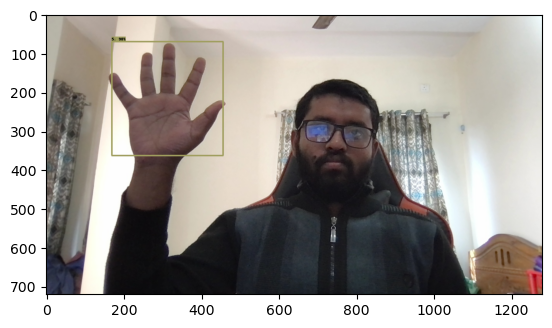

In [33]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real Time Detection

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Freezing Graph


In [30]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [31]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [32]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [33]:
!{command}

2022-12-25 15:04:52.756594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

W1225 15:05:38.138164 4498691584 save.py:271] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 173). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I1225 15:05:43.316889 4498691584 builder_impl.py:797] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config
I1225 15:05:44.770245 4498691584 config_util.py:253] Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config


# Conversion to TFJS

In [34]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 795.0 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 2.6 MB/s eta 0:00:00a 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 kB 785.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 938.1 kB/s eta 0:00:00 0:00:01


  Created wheel for jax: filename=jax-0.4.1-py3-none-any.whl size=1332478 sha256=399570aaa10c1ff07294c12135a6759731a6249e700e246ae9f52cf976724d88
  Stored in directory: /Users/shrestho12/Library/Caches/pip/wheels/50/a9/f3/86082312fd44e12e52b1b7744c37ed1d02e64deefdc735c77b
Successfully built jax
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [36]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [37]:
!{command}

2022-12-25 15:26:56.781793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Writing weight file Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport/model.json...


# Creating Zip

In [44]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}